# Pulling specific specific Bulldog data

In [78]:
import pyrebase
import config
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import time
import numpy as np
import nordypy
from collections import defaultdict

%matplotlib inline

In [112]:
config = {
"apiKey": "apiKey",
"authDomain": "projectId.firebaseapp.com",
"databaseURL": "https://surveybox-fe69c.firebaseio.com",
"storageBucket": "projectId.appspot.com"}

firebase = pyrebase.initialize_app(config)

unit_translation = {"a03e9e286f24": "Bulldog News"}

db = firebase.database()
resp = db.get()
data = []
for f, v in dict(resp.val())['accounts'].items():
    data.append(v)
#data = pd.DataFrame(data)

def convert(d):
        try:
            return datetime.datetime.fromtimestamp(int(d))
        except:
            'error'



In [126]:
# get locations and their english names {'location_id': 'bulldog'}
# get the streams associated with those locations

In [128]:
locations = {}
for loc in data:
    name = loc['name']
    for k, v in loc['locations'].items():
        locations[k] = name

In [129]:
locations

{'-M0AbGHn5cUTdJ_jmz7w': 'Bulldog News',
 '-M0AanJQ73IIIua0RTVj': 'Cafe Allegro'}

In [130]:
events = defaultdict(list)
for k, v  in dict(resp.val()['streams']).items():
    location_id = v['location_id']
    for event_key, event in v['events'].items():
        events[locations[location_id]].append(event)

In [152]:
def convert(d):
        try:
            return datetime.datetime.fromtimestamp(int(d))
        except:
            'error'

all_data = pd.DataFrame()
for k, v in events.items():
    data = pd.DataFrame(v)

    data['timestamp'] = data['timestamp'].apply(convert)
    data['count'] = 1
    print(f'Total responses: {len(data)}')
    grouped_data = data.groupby(['type'])['count'].sum().reset_index()

    list_ordering = ["walk", "wheels", 'transit', 'car']  

    grouped_data["type"] = pd.Categorical(grouped_data["type"], categories=list_ordering, ordered=True)
    grouped_data["account"] = k
    all_data = pd.concat([all_data, grouped_data])

Total responses: 216
Total responses: 194


In [161]:
data

,timestamp,type,count
0,2020-01-12 11:23:30,transit,1
1,2020-01-12 11:23:44,car,1
2,2020-01-12 11:23:50,car,1
3,2020-01-12 11:26:34,walk,1
4,2020-01-12 11:27:56,walk,1
...,...,...,...
189,2020-02-09 13:41:33,walk,1
190,2020-02-09 13:41:56,walk,1
191,2020-02-09 13:41:56,walk,1
192,2020-02-09 13:46:01,car,1


In [162]:
data.drop_duplicates(['timestamp', 'type'])

,timestamp,type,count
0,2020-01-12 11:23:30,transit,1
1,2020-01-12 11:23:44,car,1
2,2020-01-12 11:23:50,car,1
3,2020-01-12 11:26:34,walk,1
4,2020-01-12 11:27:56,walk,1
...,...,...,...
186,2020-02-09 13:34:39,transit,1
187,2020-02-09 13:35:21,transit,1
188,2020-02-09 13:41:33,walk,1
190,2020-02-09 13:41:56,walk,1


Bulldog News


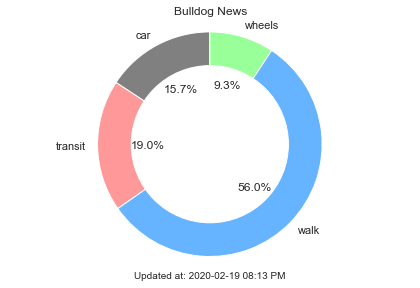

Cafe Allegro


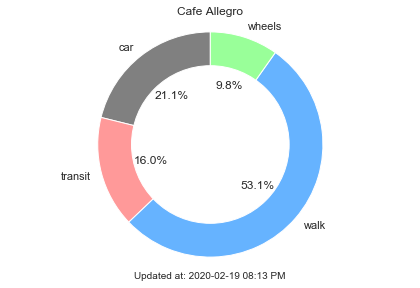

In [156]:
sns.set_style("whitegrid")
# Create an array with the colors you want to use
colors = ['#66b3ff','#99ff99','#ff9999','#808080']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

# g = sns.catplot(x="type", y="count", col="account",
#                 data=grouped_data, saturation=.5,
#                 kind="bar", aspect=1, palette=customPalette)
# (g.set_xticklabels(["walk", "wheels", "transit", "car"])
#     .set_titles("{col_name}")
#     .despine(left=True))
# sns.set(font_scale=1)
# plt.savefig('grouped_data.png')

# Pie chart

for u in all_data['account'].unique():
    mini = all_data[all_data['account'] == u]
    labels = mini['type']
    sizes = mini['count']

    #colors : car transit wheels walk
    colors = ['#808080','#ff9999','#66b3ff', '#99ff99']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=.55)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(u)
    ax1.axis('equal')  
    fig.text(.5, .01, 'Updated at: ' + str( datetime.datetime.now().strftime("%Y-%m-%d %I:%M %p")  ), 
              ha='center', fontsize=10)

    plt.tight_layout()
    path = 'output/'
    path = path + '_'.join(u.lower().split(' ')) + '.png'
    print(u)
    plt.savefig(path)
    plt.show()
    plt.close()
    #nordypy.s3_upload(bucket='modesurvey-dataviz', s3_filepath=path, 
                                                 # local_filepath=path,
                                                 # permission='public-read')

In [154]:
grouped_data

,type,count,account
0,car,41,Cafe Allegro
1,transit,31,Cafe Allegro
2,walk,103,Cafe Allegro
3,wheels,19,Cafe Allegro
